# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the cities names
cities = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]
        # Append the City information into city_data list
       city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tondano
Processing Record 2 of Set 1 | ribeira brava
Processing Record 3 of Set 1 | mili
Processing Record 4 of Set 1 | oppdal
Processing Record 5 of Set 1 | helena valley west central
Processing Record 6 of Set 1 | kalmunai
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | lukolela
Processing Record 10 of Set 1 | khandyga
Processing Record 11 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | kismayo
Processing Record 14 of Set 1 | qarqin
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | kolonia town
Processing Record 22 

City not found. Skipping...
Processing Record 33 of Set 4 | ancud
Processing Record 34 of Set 4 | keflavik
Processing Record 35 of Set 4 | usinsk
Processing Record 36 of Set 4 | tayoltita
Processing Record 37 of Set 4 | lazaro cardenas
Processing Record 38 of Set 4 | murashi
Processing Record 39 of Set 4 | port saint john's
Processing Record 40 of Set 4 | lockwood
Processing Record 41 of Set 4 | annandale
Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | jennings
Processing Record 44 of Set 4 | cotati
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | al hawatah
Processing Record 47 of Set 4 | baharly
Processing Record 48 of Set 4 | smithers
Processing Record 49 of Set 4 | pudozh
Processing Record 0 of Set 5 | fuglafjordur
Processing Record 1 of Set 5 | crane
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | ridder
Processing Record 5 of Set 5 | kailua-kona
Processing Record 6 of Set

Processing Record 24 of Set 8 | kayangel
Processing Record 25 of Set 8 | nar'yan-mar
Processing Record 26 of Set 8 | luderitz
Processing Record 27 of Set 8 | waddan
Processing Record 28 of Set 8 | pariaman
Processing Record 29 of Set 8 | aberdeen
Processing Record 30 of Set 8 | sultanah
Processing Record 31 of Set 8 | kampene
Processing Record 32 of Set 8 | swakopmund
Processing Record 33 of Set 8 | tubarjal
Processing Record 34 of Set 8 | magole
Processing Record 35 of Set 8 | midland
Processing Record 36 of Set 8 | faya-largeau
Processing Record 37 of Set 8 | orcopampa
Processing Record 38 of Set 8 | kirkwall
Processing Record 39 of Set 8 | mhamid
Processing Record 40 of Set 8 | vilyuchinsk
Processing Record 41 of Set 8 | maydanshakhr
Processing Record 42 of Set 8 | queenstown
Processing Record 43 of Set 8 | lata
Processing Record 44 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 45 of Set 8 | onega
Processing Record 46 of Set 8 | road town
Processing Record 47 o

Processing Record 11 of Set 12 | llallagua
Processing Record 12 of Set 12 | realeza
Processing Record 13 of Set 12 | alofi
Processing Record 14 of Set 12 | makeni
Processing Record 15 of Set 12 | gutierrez zamora
Processing Record 16 of Set 12 | sukhobezvodnoye
Processing Record 17 of Set 12 | safi
Processing Record 18 of Set 12 | newman
Processing Record 19 of Set 12 | faranah
Processing Record 20 of Set 12 | suntar
Processing Record 21 of Set 12 | carauari
Processing Record 22 of Set 12 | corner brook
Processing Record 23 of Set 12 | harper
Processing Record 24 of Set 12 | conduaga
Processing Record 25 of Set 12 | minas de matahambre
City not found. Skipping...
Processing Record 26 of Set 12 | pierre
Processing Record 27 of Set 12 | kasempa
Processing Record 28 of Set 12 | riohacha
Processing Record 29 of Set 12 | mahina
Processing Record 30 of Set 12 | ujae
Processing Record 31 of Set 12 | qarqaraly
Processing Record 32 of Set 12 | vieste
Processing Record 33 of Set 12 | orapa
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tondano,1.3038,124.9112,21.05,94,52,1.64,ID,1691514137
1,ribeira brava,32.6500,-17.0667,27.35,61,0,3.38,PT,1691514138
2,mili,6.0815,171.7350,27.21,81,100,5.08,MH,1691514140
3,oppdal,62.5943,9.6912,13.59,96,100,2.52,NO,1691514141
4,helena valley west central,46.6629,-112.0604,22.62,57,2,1.79,US,1691514142


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tondano,1.3038,124.9112,21.05,94,52,1.64,ID,1691514137
1,ribeira brava,32.6500,-17.0667,27.35,61,0,3.38,PT,1691514138
2,mili,6.0815,171.7350,27.21,81,100,5.08,MH,1691514140
3,oppdal,62.5943,9.6912,13.59,96,100,2.52,NO,1691514141
4,helena valley west central,46.6629,-112.0604,22.62,57,2,1.79,US,1691514142


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

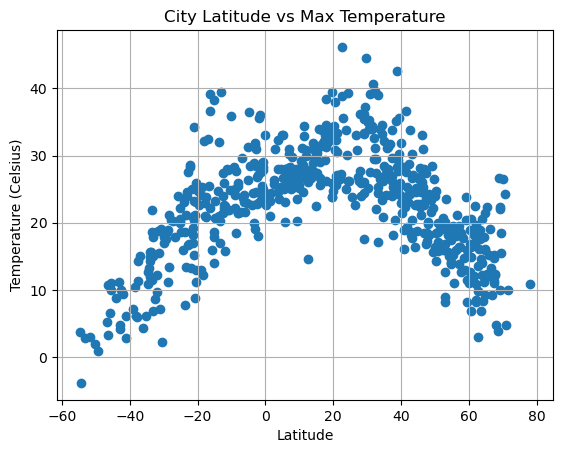

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

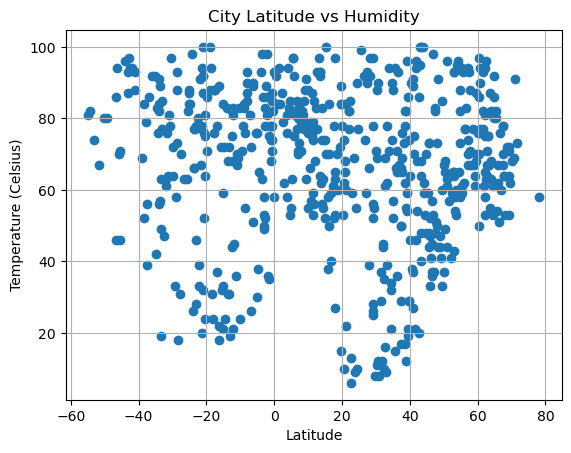

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

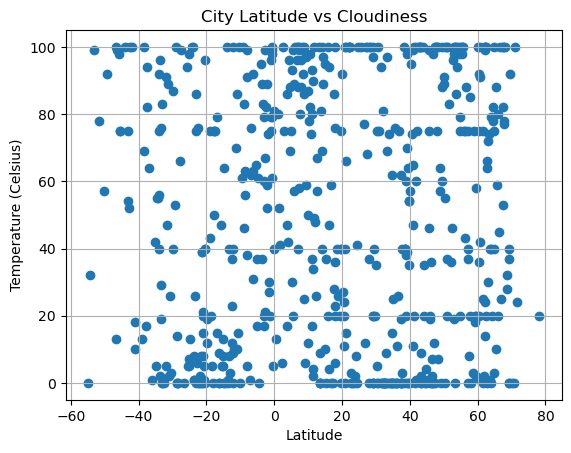

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

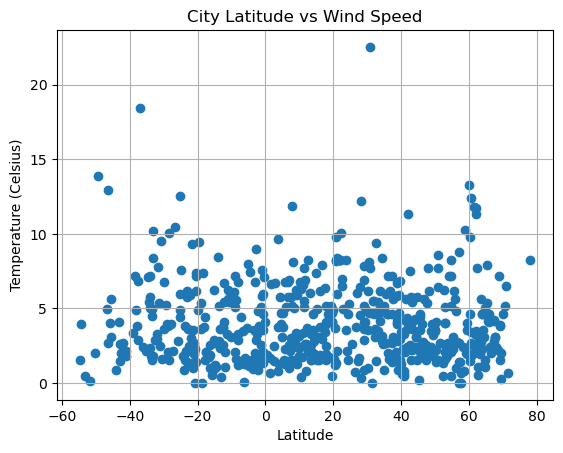

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:0.07649173402683698


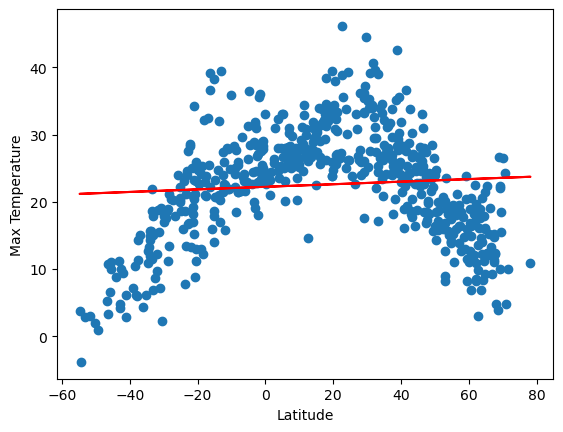

In [13]:
# Define a function to create Linear Regression plots
#LAT VS MAX TEMP
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tondano,1.3038,124.9112,21.05,94,52,1.64,ID,1691514137
1,ribeira brava,32.6500,-17.0667,27.35,61,0,3.38,PT,1691514138
2,mili,6.0815,171.7350,27.21,81,100,5.08,MH,1691514140
3,oppdal,62.5943,9.6912,13.59,96,100,2.52,NO,1691514141
4,helena valley west central,46.6629,-112.0604,22.62,57,2,1.79,US,1691514142


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,puerto natales,-51.7236,-72.4875,2.96,67,78,0.14,CL,1691514088
8,lukolela,-1.0605,17.1821,25.40,68,79,1.38,CD,1691514145
11,kismayo,-0.3582,42.5454,24.56,82,5,7.13,SO,1691514149
13,uturoa,-16.7333,-151.4333,25.40,78,79,1.71,PF,1691514151
14,adamstown,-25.0660,-130.1015,22.27,87,98,12.56,PN,1691514152


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6574427433971426


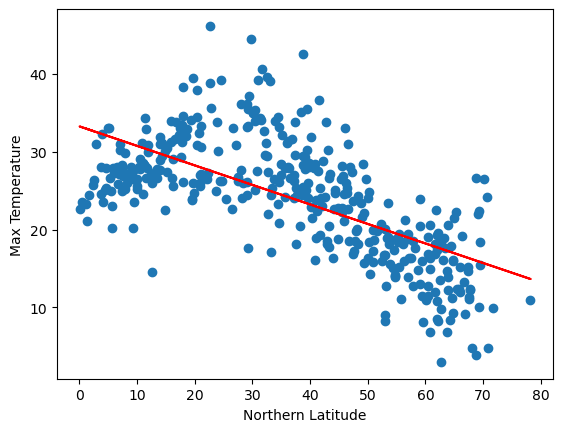

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.7843113334676145


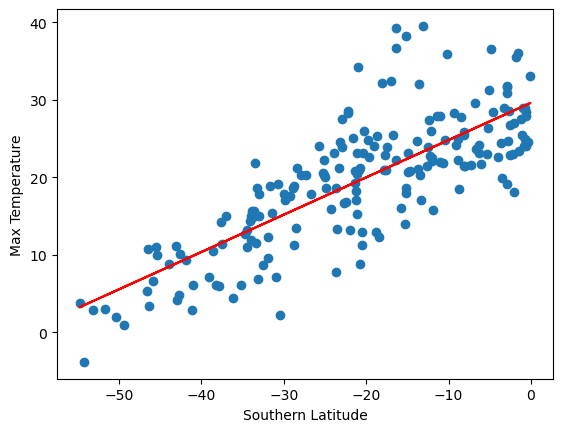

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

There is a strong correlation between temperature and the bopth hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.04417817946328212


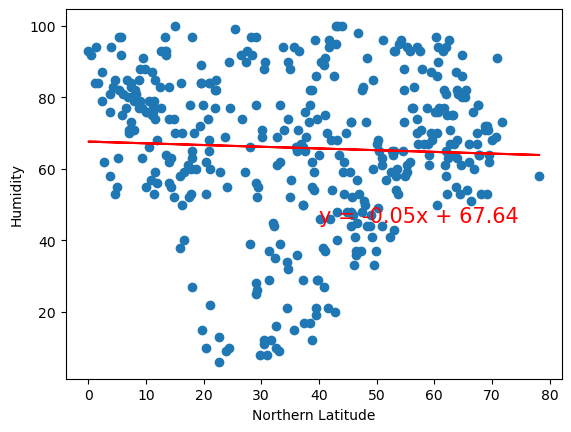

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.11113510574766843


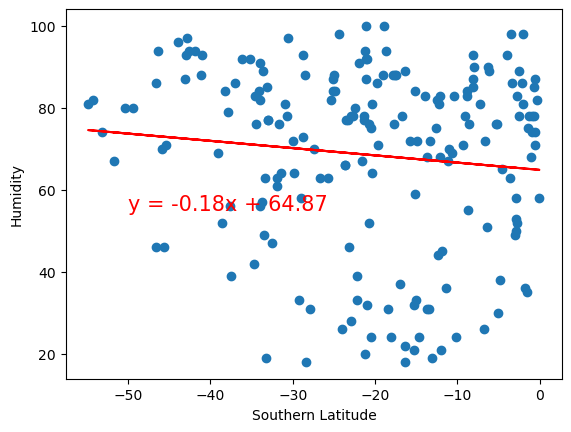

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

Very weak correlation or none between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.03729276677652066


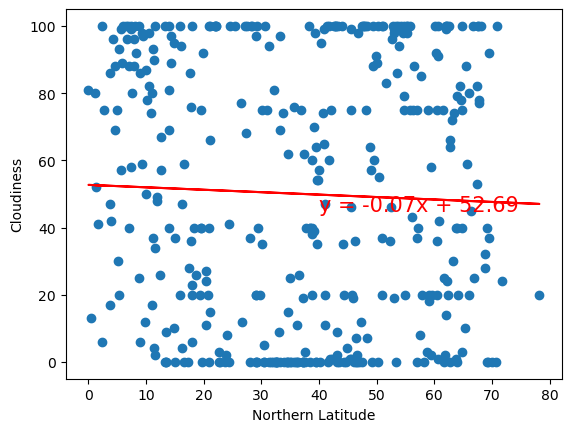

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.01865874670584755


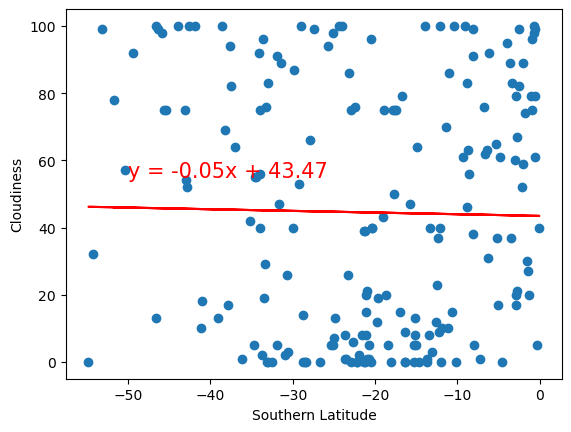

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

Very weak correlation or none between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.05789292103015415


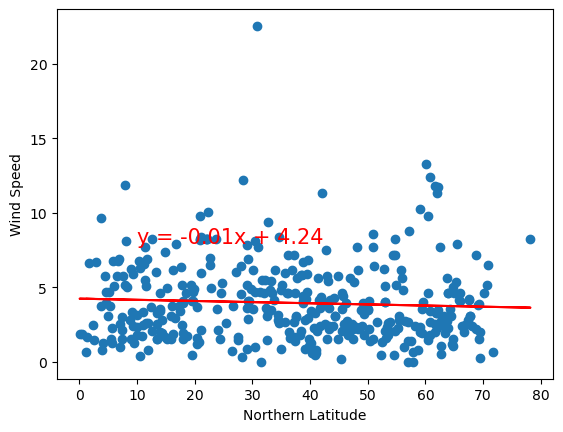

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.1255464198305193


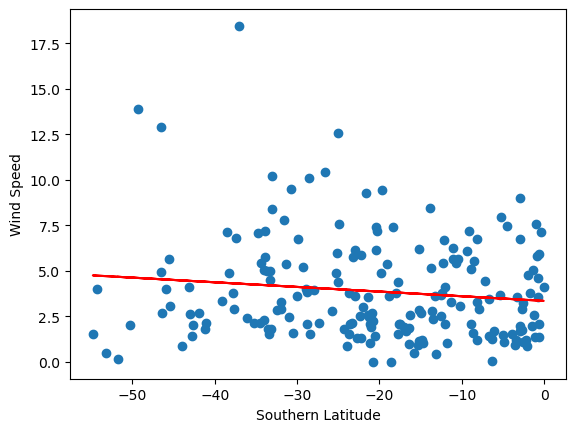

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

Very weak correlation or none between wind speed and latitude.